## IMPORTS and UTILS

In [22]:
import os
import pandas as pd


from robust_evaluation_tools.robust_utils import get_complete_combination
from robust_evaluation_tools.robust_outlier_detection import find_outliers, get_metrics
from robust_evaluation_tools.synthectic_sites_generations import generate_sites
from robust_evaluation_tools.robust_analysis import calculate_precision_by_bundle

MAINFOLDER = "PRECISION_TEST"
SYNTHETIC_SITES = f"{MAINFOLDER}/SYNTHETIC_SITES"

ANALYSIS_FOLDER = "ANALYSIS"

## EXECUTOR

In [23]:
site_group = 'ADNI'
robust_method = 'MAD_MEAN'
metric = "md"
method= "classic"
disease='AD'
SYNTHETIC_SITES_VERSION = "v1"

sites_dir = os.path.join(SYNTHETIC_SITES, SYNTHETIC_SITES_VERSION)
os.makedirs(SYNTHETIC_SITES, exist_ok=True)


# combination = get_complete_combination('DONNES', 'adni_compilation*.csv.gz')
# combination['metric_bundle'] = combination['metric'] + "_" + combination['bundle']
# combination.to_csv(os.path.join('DONNES', 'adni_combination_all_metrics.csv.gz'), index=False)

path = os.path.join('DONNES', 'adni_combination_all_metrics.csv.gz')

print('do')


#sample_sizes = [30, 50, 100, 150, 200, 300]  # Différentes tailles d'échantillon
#disease_ratios = [0.1, 0.2, 0.3, 0.4, 0.5, 0.7]  # Différents pourcentages de malades
sample_sizes = [200]  # Différentes tailles d'échantillon
disease_ratios = [0.3]  # Différents pourcentages de malades
num_tests = 30  # Nombre de tests à effectuer pour chaque combinaison

#generate_sites(sample_sizes, disease_ratios, num_tests, sites_dir, path, disease)




do


In [24]:
# Split the data into training and testing sets
directory = os.path.join(MAINFOLDER, robust_method)
directory_site = os.path.join(SYNTHETIC_SITES ,SYNTHETIC_SITES_VERSION)
# Initialize DataFrames to store the results
outliers_compilation = pd.DataFrame()
metrics_compilation = pd.DataFrame()

for sample_size in sample_sizes:
    for disease_ratio in disease_ratios:        
        sizeDir = os.path.join(directory, f"{sample_size}_{int(disease_ratio*100)}")
        sizeDir_site = os.path.join(directory_site, f"{sample_size}_{int(disease_ratio*100)}")
        for i in range(num_tests):
            tempDir = os.path.join(sizeDir, f"{i}")
            tempDir_site = os.path.join(sizeDir_site, f"{i}")
            os.makedirs(tempDir, exist_ok=True)

            train_file_name = f"train_{sample_size}_{int(disease_ratio*100)}_{i}_all.csv"
            test_file_name = f"test_{sample_size}_{int(disease_ratio*100)}_{i}_all.csv"
            
            # Sauvegarder l'échantillon dans un fichier temporaire
            temp_file = os.path.join(tempDir_site,train_file_name )
            train_df = pd.read_csv(temp_file)
            train_df.to_csv(os.path.join(tempDir,train_file_name ), index=False)

            test_file = os.path.join(tempDir_site, test_file_name)
            test_df = pd.read_csv(test_file)
            test_df.to_csv(os.path.join(tempDir,test_file_name ), index=False)



            outliers_idx = find_outliers(train_df, robust_method)
            metrics = get_metrics(outliers_idx, train_df)

            outliers = train_df.loc[outliers_idx]
            

            metrics_compilation = pd.concat([metrics_compilation, metrics])
            outliers_compilation = pd.concat([outliers_compilation, outliers])
# Save the metrics and distances compilation DataFrames to CSV files
metrics_compilation.to_csv(os.path.join(directory, "metrics_compilation.csv"), index=False)
outliers_compilation.to_csv(os.path.join(directory, "outliers_compilation.csv"), index=False)

/home/local/USHERBROOKE/davy3001/Documents/COMBAT/Jodoin/Combat_robust/.robust/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/local/USHERBROOKE/davy3001/Documents/COMBAT/Jodoin/Combat_robust/.robust/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/local/USHERBROOKE/davy3001/Documents/COMBAT/Jodoin/Combat_robust/.robust/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples

In [19]:
# Exemple d'utilisation
precision_df = calculate_precision_by_bundle(pd.read_csv(os.path.join(MAINFOLDER, robust_method, "metrics_compilation.csv")))
precision_df = precision_df.sort_values(by='precision', ascending=False)
precision_df.to_csv(os.path.join(directory, "metrics_per_bundle.csv"), index=True)
precision_df

metric                       f1_score  false_negatives  false_positives  \
fw_mni_AC                    0.163657        54.633333         0.000000   
ad_mni_OR_L                  0.146664        55.233333         0.000000   
ad_mni_PPT_L                 0.118364        56.200000         0.000000   
mdt_mni_IIT_mask_skeletonFA  0.113613        56.366667         0.000000   
md_mni_FPT_R                 0.133176        55.700000         0.000000   
...                               ...              ...              ...   
adt_mni_C_L                  0.000000        60.000000         0.000000   
md_mni_MCP                   0.000000        60.000000         0.000000   
mdt_mni_ICP_R                0.000000        60.000000         0.966667   
adt_mni_CC_ForcepsMinor      0.000000        60.000000         0.000000   
adt_mni_AST_L                0.000000        60.000000         0.000000   

metric                       precision    recall  taux_faux_positifs  \
fw_mni_AC                          1.0  0.089444            0.000000   
ad_mni_OR_L                        1.0  0.079444            0.000000   
ad_mni_PPT_L                       1.0  0.063333            0.000000   
mdt_mni_IIT_mask_skeletonFA        1.0  0.060556            0.000000   
md_mni_FPT_R                       1.0  0.071667            0.000000   
...                                ...       ...                 ...   
adt_mni_C_L                        0.0  0.000000            0.000000   
md_mni_MCP                         0.0  0.000000            0.000000   
mdt_mni_ICP_R                      0.0  0.000000            0.006905   
adt_mni_CC_ForcepsMinor            0.0  0.000000            0.000000   
adt_mni_AST_L                      0.0  0.000000            0.000000   

metric                       true_negatives  true_positives  
fw_mni_AC                        140.000000        5.366667  
ad_mni_OR_L                      140.000000        4.766667  
ad_mni_PPT_L                     140.000000        3.800000  
mdt_mni_IIT_mask_skeletonFA      140.000000        3.633333  
md_mni_FPT_R                     140.000000        4.300000  
...                                     ...             ...  
adt_mni_C_L                      140.000000        0.000000  
md_mni_MCP                       140.000000        0.000000  
mdt_mni_ICP_R                    139.033333        0.000000  
adt_mni_CC_ForcepsMinor          140.000000        0.000000  
adt_mni_AST_L                    140.000000        0.000000  

[431 rows x 8 columns]

In [20]:
precision_df = precision_df.sort_values(by='f1_score', ascending=False)
precision_df

metric                  f1_score  false_negatives  false_positives  precision  \
overall                 0.567884        30.566667        14.200000   0.676105   
fw_mni_AF_R             0.303162        49.233333         0.000000   1.000000   
fw_mni_SLF_R            0.269755        50.600000         0.000000   1.000000   
fw_mni_CC_ForcepsMinor  0.256249        51.100000         0.000000   1.000000   
rd_mni_AF_R             0.254525        51.200000         0.000000   1.000000   
...                          ...              ...              ...        ...   
adt_mni_MCP             0.000000        60.000000         1.000000   0.000000   
afd_mni_ICP_R           0.000000        60.000000         0.666667   0.000000   
adt_mni_ICP_R           0.000000        60.000000         1.566667   0.000000   
adt_mni_AF_R            0.000000        60.000000         0.600000   0.000000   
adt_mni_AST_L           0.000000        60.000000         0.000000   0.000000   

metric                    recall  taux_faux_positifs  true_negatives  \
overall                 0.490556            0.101429      125.800000   
fw_mni_AF_R             0.179444            0.000000      140.000000   
fw_mni_SLF_R            0.156667            0.000000      140.000000   
fw_mni_CC_ForcepsMinor  0.148333            0.000000      140.000000   
rd_mni_AF_R             0.146667            0.000000      140.000000   
...                          ...                 ...             ...   
adt_mni_MCP             0.000000            0.007143      139.000000   
afd_mni_ICP_R           0.000000            0.004762      139.333333   
adt_mni_ICP_R           0.000000            0.011190      138.433333   
adt_mni_AF_R            0.000000            0.004286      139.400000   
adt_mni_AST_L           0.000000            0.000000      140.000000   

metric                  true_positives  
overall                      29.433333  
fw_mni_AF_R                  10.766667  
fw_mni_SLF_R                  9.400000  
fw_mni_CC_ForcepsMinor        8.900000  
rd_mni_AF_R                   8.800000  
...                                ...  
adt_mni_MCP                   0.000000  
afd_mni_ICP_R                 0.000000  
adt_mni_ICP_R                 0.000000  
adt_mni_AF_R                  0.000000  
adt_mni_AST_L                 0.000000  

[431 rows x 8 columns]

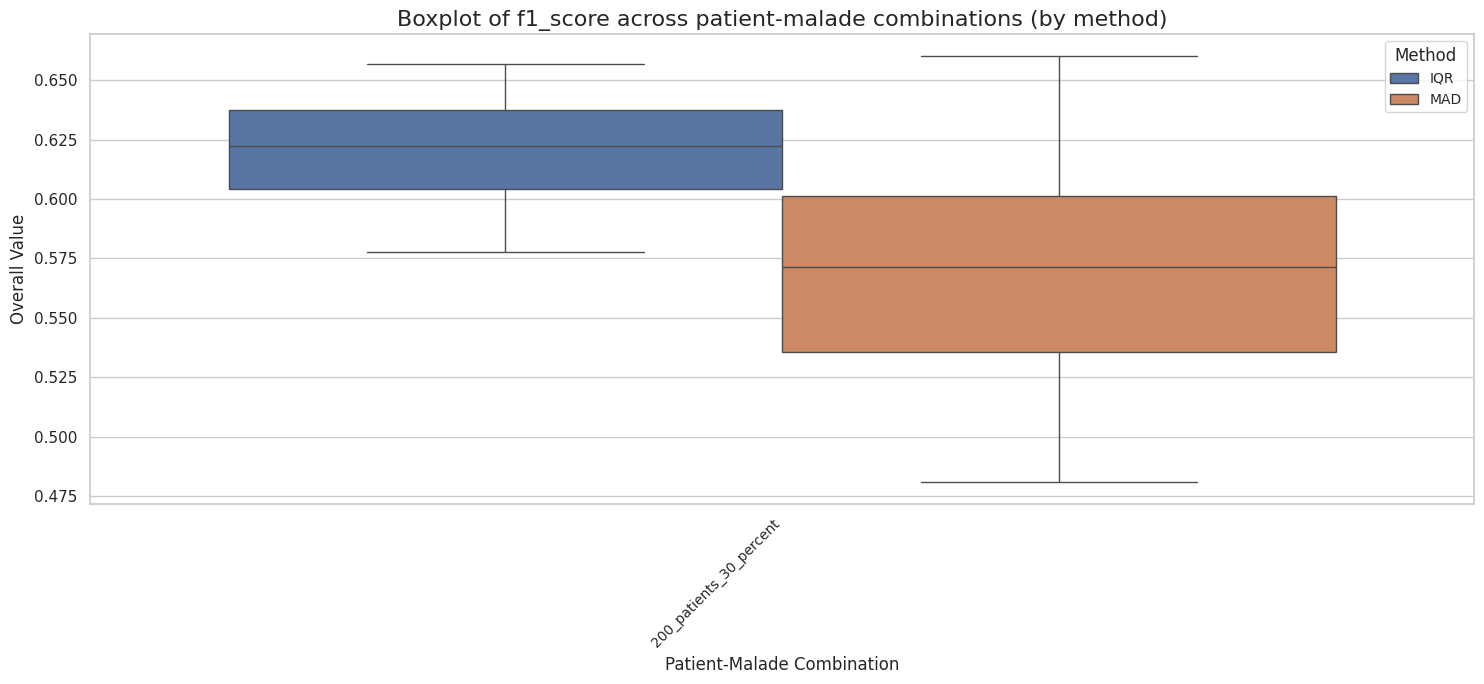

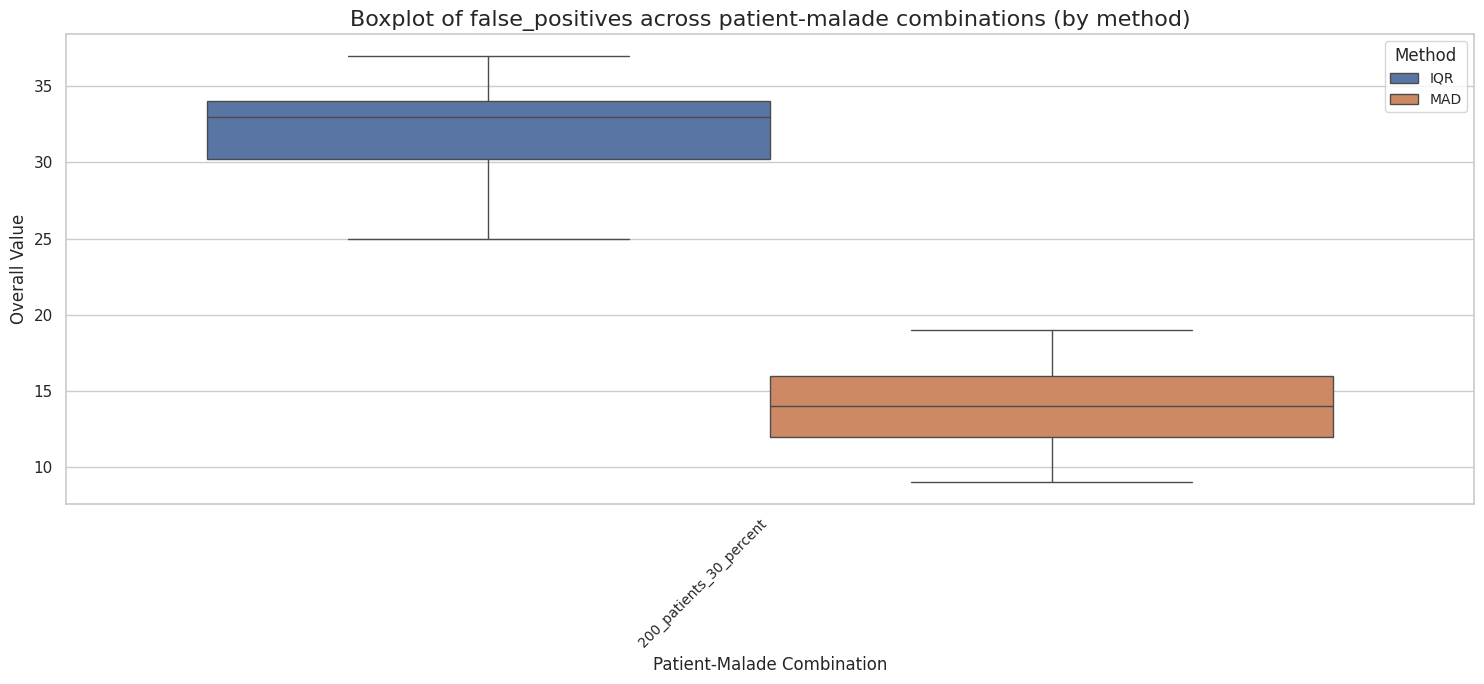

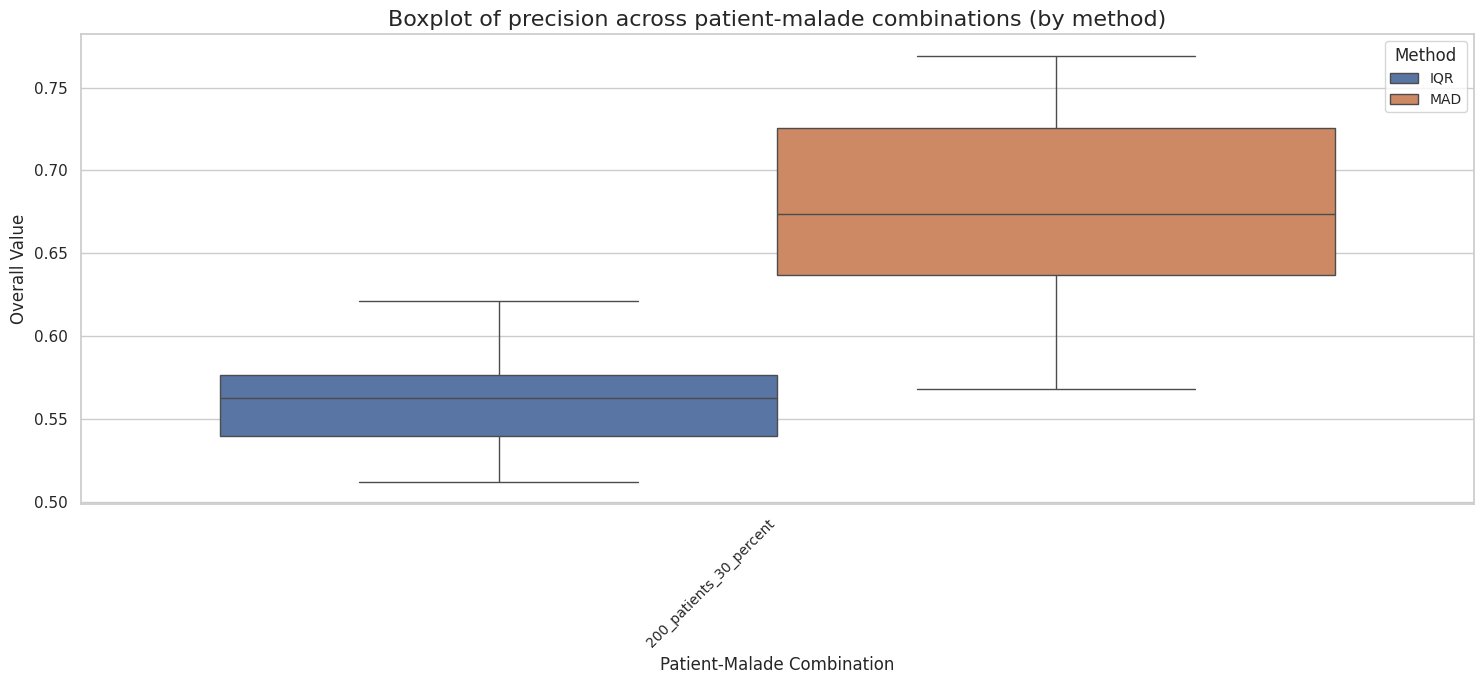

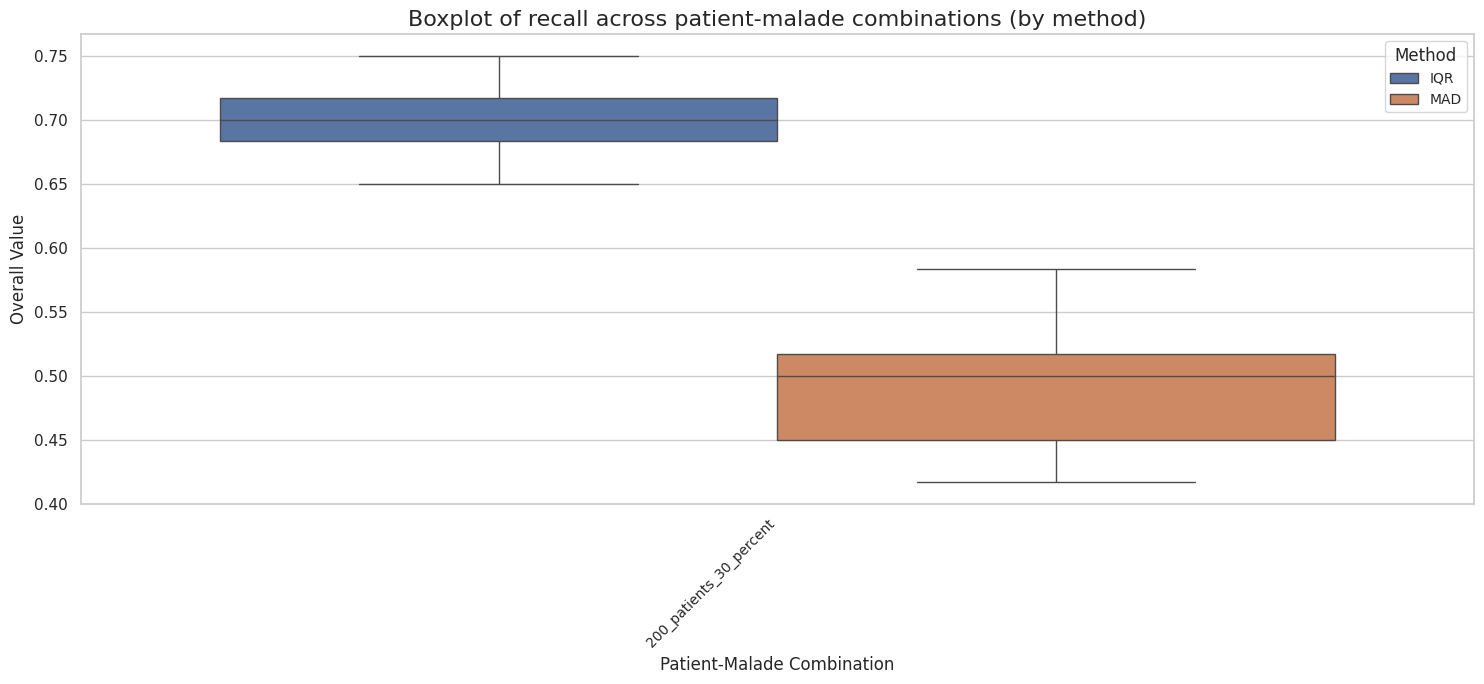

In [21]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Function to load data from method folders
def load_data_from_folders(base_path, methods, file_name):
    data_frames = []
    for method in methods:
        method_path = os.path.join(base_path, method)
        file_path = os.path.join(method_path, file_name)
        if os.path.exists(file_path):
            df = pd.read_csv(file_path)
            df['method'] = method  # Add a column to identify the method
            data_frames.append(df)
        else:
            print(f"File not found for method {method}: {file_path}")
    return pd.concat(data_frames, ignore_index=True) if data_frames else pd.DataFrame()

# Base folder and methods
base_folder = MAINFOLDER  # Replace with actual base folder
methods = ['IQR', 'MAD']  # Replace with actual method folder names
file_name = 'metrics_compilation.csv'  # Replace with actual file name

# Load the combined data
data_combined = load_data_from_folders(base_folder, methods, file_name)

# Filter the relevant columns
filtered_data = data_combined[['metric', 'overall', 'site', 'method']]

# Extract metrics of interest
metrics_of_interest = ['precision', 'f1_score', 'recall', 'false_positives']
filtered_data = filtered_data[filtered_data['metric'].isin(metrics_of_interest)]

# Group sites by unique patient-malade combination
filtered_data['site_group'] = filtered_data['site'].str.extract(r'(\d+_patients_\d+_percent)')[0]

# Set up the plot style
sns.set(style="whitegrid")

# Iterate through each metric and create a boxplot
metrics = filtered_data['metric'].unique()

for metric in metrics:
    plt.figure(figsize=(15, 7))
    metric_data = filtered_data[filtered_data['metric'] == metric]

    # Create the boxplot
    sns.boxplot(
        x='site_group',
        y='overall',
        hue='method',  # Add the method as a hue
        data=metric_data,
        showfliers=False  # Remove outliers for clarity
    )

    # Customize the plot
    plt.title(f'Boxplot of {metric} across patient-malade combinations (by method)', fontsize=16)
    plt.xticks(rotation=45, ha='right', fontsize=10)
    plt.xlabel('Patient-Malade Combination', fontsize=12)
    plt.ylabel('Overall Value', fontsize=12)
    plt.legend(title='Method', fontsize=10)
    plt.tight_layout()
    plt.show()
